<a href="https://colab.research.google.com/github/AngelaKTE/Gitcoin_Grants/blob/main/Gitcoin_grants_round_8_EDA_(partial_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set_style("whitegrid")

In [ ]:
url = 'https://github.com/gitcoinco/gitcoin_cadcad_model/blob/main/model/data/data.csv.xz?raw=true'
df = pd.read_csv(url, compression='xz')
# same amount across multiple grants -> collection?
df.head()

,time_sequence,contributor,grant,amount,flag
0,0,a0b99288e1,Coin Center is educating policy makers about p...,95.0,0
1,1,55d1f7cbf0,Bankless,39.9,0
2,2,55d1f7cbf0,Coin Center is educating policy makers about p...,39.9,0
3,3,55d1f7cbf0,The Defiant,39.9,0
4,4,55d1f7cbf0,The Daily Gwei by Anthony Sassano (sassal0x),39.9,0


In [ ]:
df.tail()

,time_sequence,contributor,grant,amount,flag
17654,17654,ff734df6f7,Vault74 - A Fast & Painless Decentralized Chat,0.0,0
17655,17655,ff734df6f7,Lakshman's blog about the future of Ethereum,0.0,0
17656,17656,ff734df6f7,Mindful - Portfolio Alignment for Degens,0.0,0
17657,17657,ff734df6f7,The Ethereum Open Desktop Environment,0.0,0
17658,17658,ff734df6f7,Raven-Anonymous decentralized message broadcas...,0.0,0


## Basic stats

In [ ]:
# 17658 time steps
# there are no contributions with a boolean flag set to 1
df.describe()

,time_sequence,amount,flag
count,17659.000000,17659.000000,17659.0
mean,8829.000000,23.048347,0.0
std,5097.858537,337.680555,0.0
min,0.000000,0.000000,0.0
25%,4414.500000,0.950000,0.0
50%,8829.000000,2.774159,0.0
75%,13243.500000,5.000000,0.0
max,17658.000000,28500.000000,0.0


In [ ]:
print(f"Total contribution amount: ${round(df['amount'].sum())}")
print(f"Number of unique contributors: {len(df['contributor'].unique())}")
print(f"Number of unique grants: {len(df['grant'].unique())}")

Total contribution amount: $407011
Number of unique contributors: 4721
Number of unique grants: 549


## Contribution amount distribution

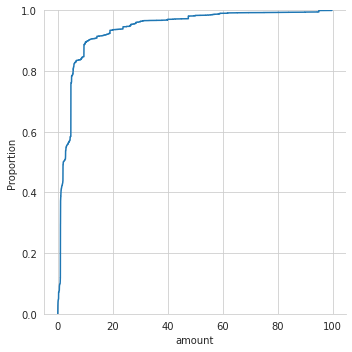

In [ ]:
sns.displot(df[df['amount'] < 100], x="amount", kind="ecdf");

In [ ]:
amount_threshold = 10
print(f"{round(len(df[df['amount'] < amount_threshold]) / len(df), 3)*100}% of individual grant contributions are lower than {amount_threshold} dollars.")

87.2% of individual grant contributions are lower than 10 dollars.


## Top contributors by total contribution amount

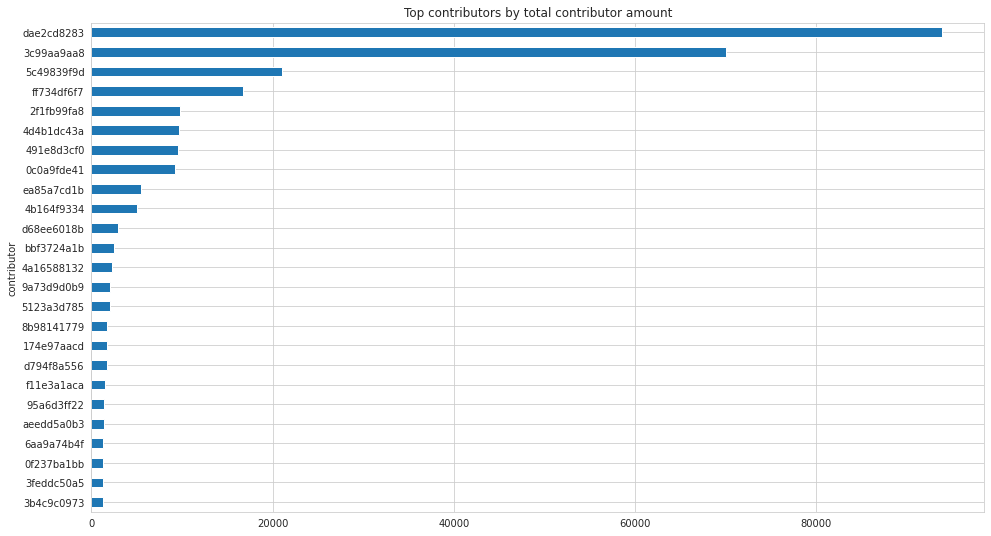

In [ ]:
df.groupby('contributor').sum()['amount'].sort_values(ascending=False)[0:25].sort_values().plot(kind='barh', figsize=(16,9), title = 'Top contributors by total contributor amount');

## Top contributors by unique grants

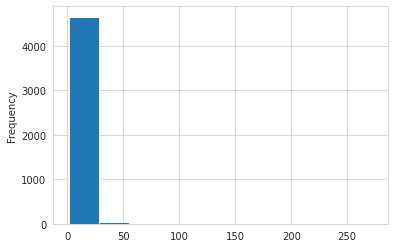

In [ ]:
df.groupby('contributor').nunique()['grant'].plot(kind='hist');

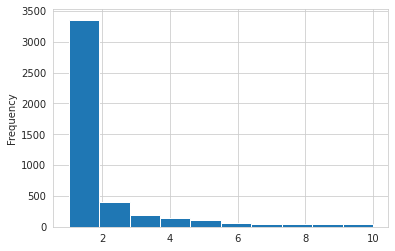

In [ ]:
df.groupby('contributor').nunique()['grant'].plot(kind='hist', range = [1, 10]);

In [ ]:
df.groupby('contributor').nunique()['grant'].value_counts()[0:5]

1    3356
2     406
3     193
4     138
5     113
Name: grant, dtype: int64

In [ ]:
print(f"{round((df.groupby('contributor').nunique()['grant'] == 1).sum() / len(df['contributor'].unique())*100,2)}% of users contributed to one grant")

71.09% of users contributed to one grant


## Top grants by total contribution amount

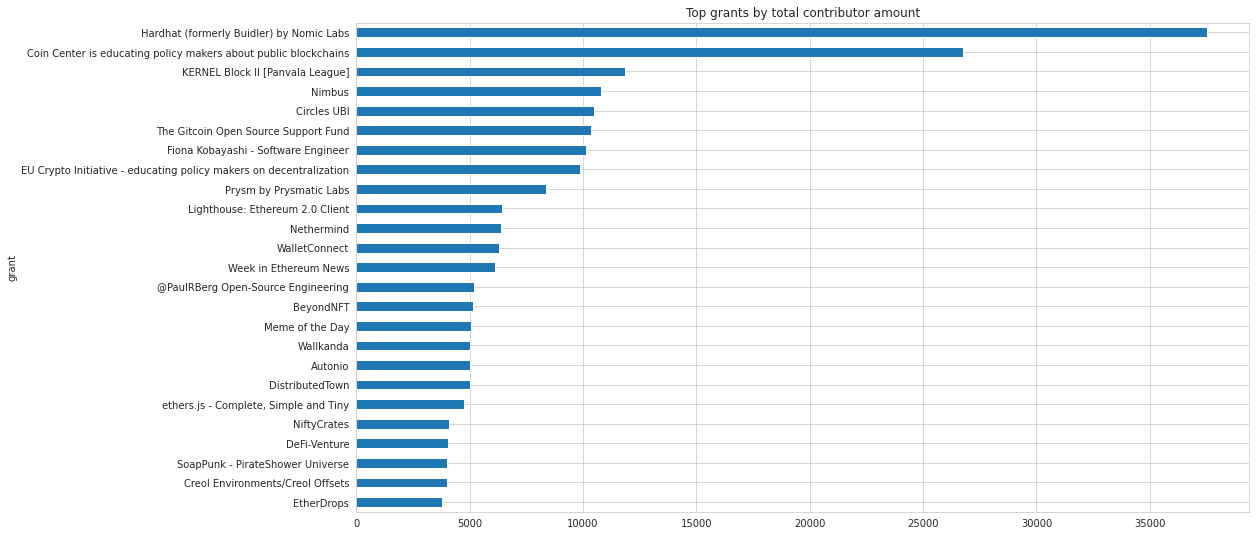

In [ ]:
df.groupby('grant').sum()['amount'].sort_values(ascending=False)[0:25].sort_values().plot(kind='barh', figsize=(16,9), title='Top grants by total contributor amount');

## Top grants by unique contributors

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128262 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128262 missing from current font.
  font.set_text(s, 0, flags=flags)


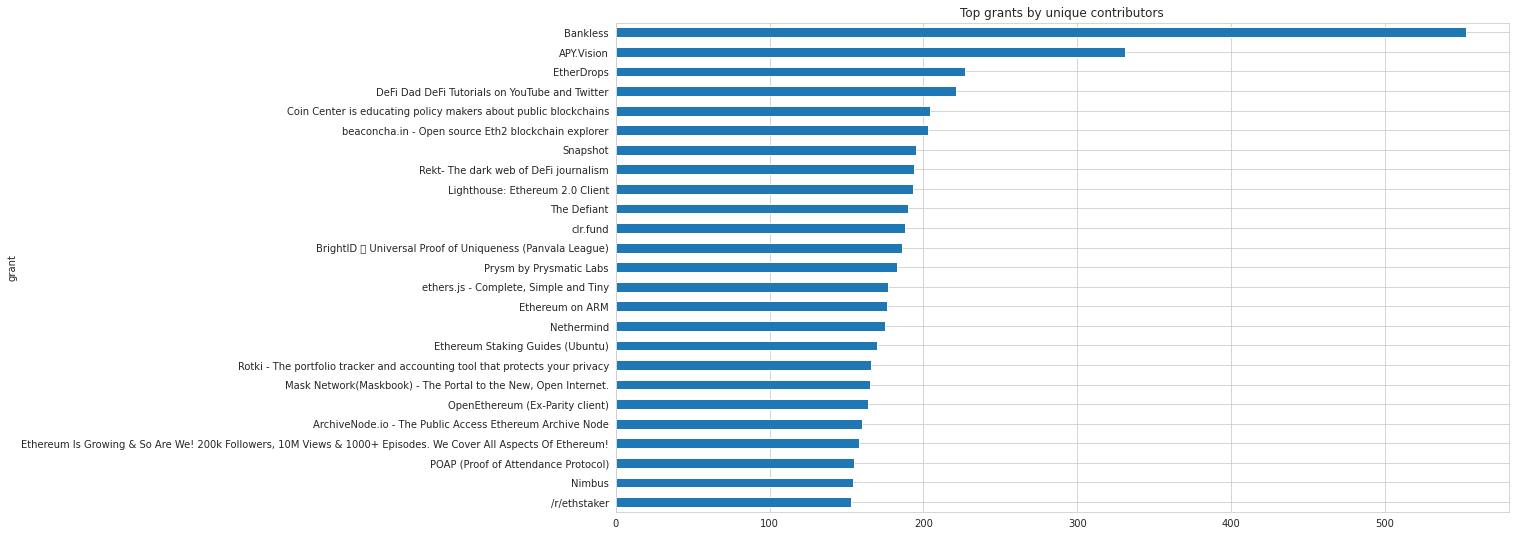

In [ ]:
df.groupby('grant').nunique()['contributor'].sort_values(ascending=False)[0:25].sort_values().plot(kind='barh', figsize=(16,9), title='Top grants by unique contributors');

## Grant contribution correlation

In [ ]:
# plotting a diagonal correlation matrix
# too many grants to plot, we filter the top ones by total contribution amount

top_grants = df.groupby('grant').sum()['amount'].sort_values(ascending=False)[:10]
top_grants_names = list(top_grants.index)
top_grants_contributions = df[df['grant'].isin(top_grants_names)]
top_grants

grant
Hardhat (formerly Buidler) by Nomic Labs                              37503.190889
Coin Center is educating policy makers about public blockchains       26744.646612
KERNEL Block II [Panvala League]                                      11834.729621
Nimbus                                                                10772.058923
Circles UBI                                                           10496.774948
The Gitcoin Open Source Support Fund                                  10350.121362
Fiona Kobayashi - Software Engineer                                   10151.000945
EU Crypto Initiative - educating policy makers on decentralization     9869.486846
Prysm by Prysmatic Labs                                                8368.949548
Lighthouse: Ethereum 2.0 Client                                        6430.392528
Name: amount, dtype: float64

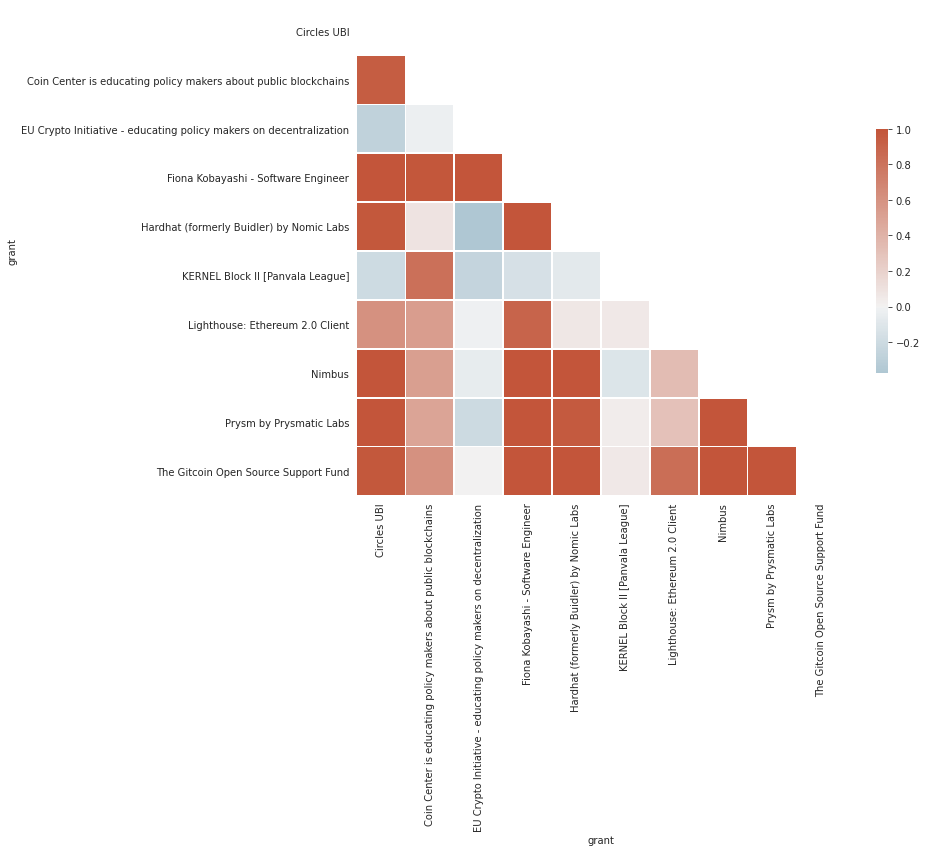

In [ ]:
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html

# calculate correlation between contributor and grants
corr = top_grants_contributions.groupby(['grant', 'contributor']).sum()['amount'].unstack(0).corr().fillna(0)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

## Grant contributor correlation

In [ ]:
# plotting a diagonal correlation matrix
# too many contributors to plot, selecting the top 10 by total contribution amount

top_contributors = df.groupby('contributor').sum()['amount'].sort_values(ascending=False)[:10]
top_contributors_addresses = list(top_contributors.index)
top_contributors_contributions = df[df['contributor'].isin(top_contributors_addresses)]
top_contributors

contributor
dae2cd8283    93823.006254
3c99aa9aa8    70003.736235
5c49839f9d    21000.000000
ff734df6f7    16769.542482
2f1fb99fa8     9721.000000
4d4b1dc43a     9685.748923
491e8d3cf0     9500.000000
0c0a9fde41     9215.000000
ea85a7cd1b     5495.565928
4b164f9334     5029.751294
Name: amount, dtype: float64

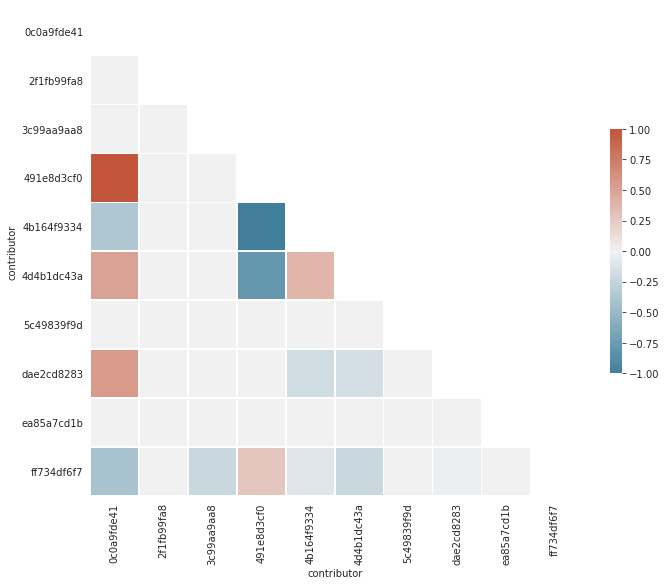

In [ ]:
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html

# calculate correlation between contributor and grants
corr = top_contributors_contributions.groupby(['grant', 'contributor']).sum()['amount'].unstack(1).corr().fillna(0)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [ ]:
df[df['contributor'] == '491e8d3cf0']

,time_sequence,contributor,grant,amount,flag
4076,4076,491e8d3cf0,"ethers.js - Complete, Simple and Tiny",1900.0,0
4077,4077,491e8d3cf0,hardhat-deploy,1900.0,0
4078,4078,491e8d3cf0,Hardhat (formerly Buidler) by Nomic Labs,5700.0,0


In [ ]:
df[df['contributor'] == '0c0a9fde41']

,time_sequence,contributor,grant,amount,flag
4459,4459,0c0a9fde41,Nethermind,475.0,0
4460,4460,0c0a9fde41,OpenEthereum (Ex-Parity client),950.0,0
4461,4461,0c0a9fde41,Ethereum on ARM,95.0,0
4462,4462,0c0a9fde41,EthHub - Ethereum Information Hub,190.0,0
4463,4463,0c0a9fde41,Catnip,950.0,0
4464,4464,0c0a9fde41,DeFi Dad DeFi Tutorials on YouTube and Twitter,95.0,0
4465,4465,0c0a9fde41,ETH2 Staking Guides by CoinCashew,95.0,0
4466,4466,0c0a9fde41,Week in Ethereum News,95.0,0
4467,4467,0c0a9fde41,Hardhat (formerly Buidler) by Nomic Labs,1900.0,0
4468,4468,0c0a9fde41,"ethers.js - Complete, Simple and Tiny",950.0,0


## Total grant contribution amount vs. unique grant contributors

In [ ]:
df_plot = pd.merge(pd.DataFrame(df.groupby('grant').sum()['amount']).reset_index(), pd.DataFrame(df.groupby('grant').nunique()['contributor']).reset_index(), on='grant')
df_plot.columns = ['grant_name', 'total_contribution_amount', 'unique_contributors']
df_plot['avg_contribution_per_contributor'] = df_plot['total_contribution_amount'] / df_plot['unique_contributors']
df_plot.head()

,grant_name,total_contribution_amount,unique_contributors,avg_contribution_per_contributor
0,""" Secret Garden "" —Crypto Art Exhibition for C...",274.575212,52,5.280293
1,#WeTeachBlockchain — Free Decentralized Education,12.561267,2,6.280634
2,/r/ethstaker,2803.382049,153,18.322758
3,1Hive Gardens,111.563239,18,6.197958
4,1PLANET Marketplace: A Working DApp! Access Ca...,1.244802,2,0.622401


In [ ]:
# https://plotly.com/python/line-and-scatter/
fig = px.scatter(df_plot, x='total_contribution_amount', y='unique_contributors', hover_data=['grant_name'], title="Total grant contribution amount vs. unique grant contributors")
fig.show()

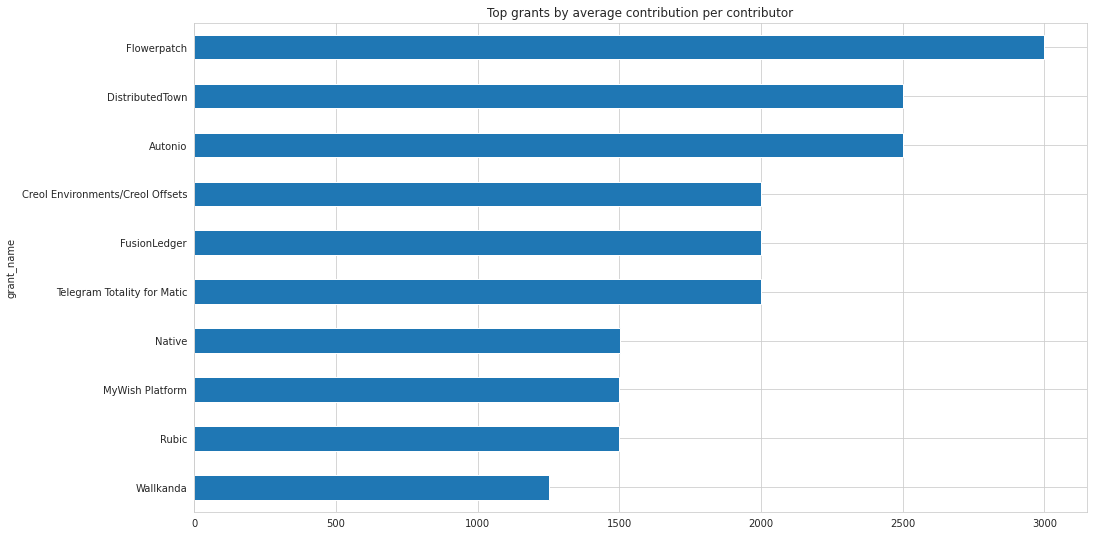

In [ ]:
df_plot.set_index('grant_name')['avg_contribution_per_contributor'].sort_values(ascending=False)[0:10].sort_values().plot(kind='barh', title='Top grants by average contribution per contributor', figsize=(16,9));